In [35]:
!pip install japanize-matplotlib

In [132]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [133]:
df_A = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-A-2024aaa.csv" , encoding='shift-jis' , header = 2)
df_B = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-B-2025bbb.csv" ,encoding='shift-jis' , header = 1)
df_C = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-C-2025ccc.csv" , encoding='shift-jis')
df_D = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-D-2023ddd.csv" , encoding='shift-jis')
df_E = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-E-2025eee.csv" , encoding='shift-jis')
df_F = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\MPコースcoffee\Data_copy\SSDSE-F-2023fff.csv" , encoding='shift-jis')

In [151]:
# df_B.head(5)

In [135]:
df_D["MD31"] = pd.to_numeric(df_D["MD31"], errors='coerce')
df_D["MG01"] = pd.to_numeric(df_D["MG01"], errors='coerce')

In [152]:
# df_B.describe()

In [153]:
# df_B[df_B.iloc[:, 2] == '北海道'].describe()

In [154]:
# df_B[df_B.iloc[:, 2] == '北海道']

In [155]:
# print("都道府県別総人口",df_B.groupby(df_B.iloc[:, 2])[df_B.columns[3]].mean().sort_values(ascending=False))

C:\Users\sk062\AppData\Local\Temp\ipykernel_13996\3135346268.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 48)(np.linspace(0, 1, 48))


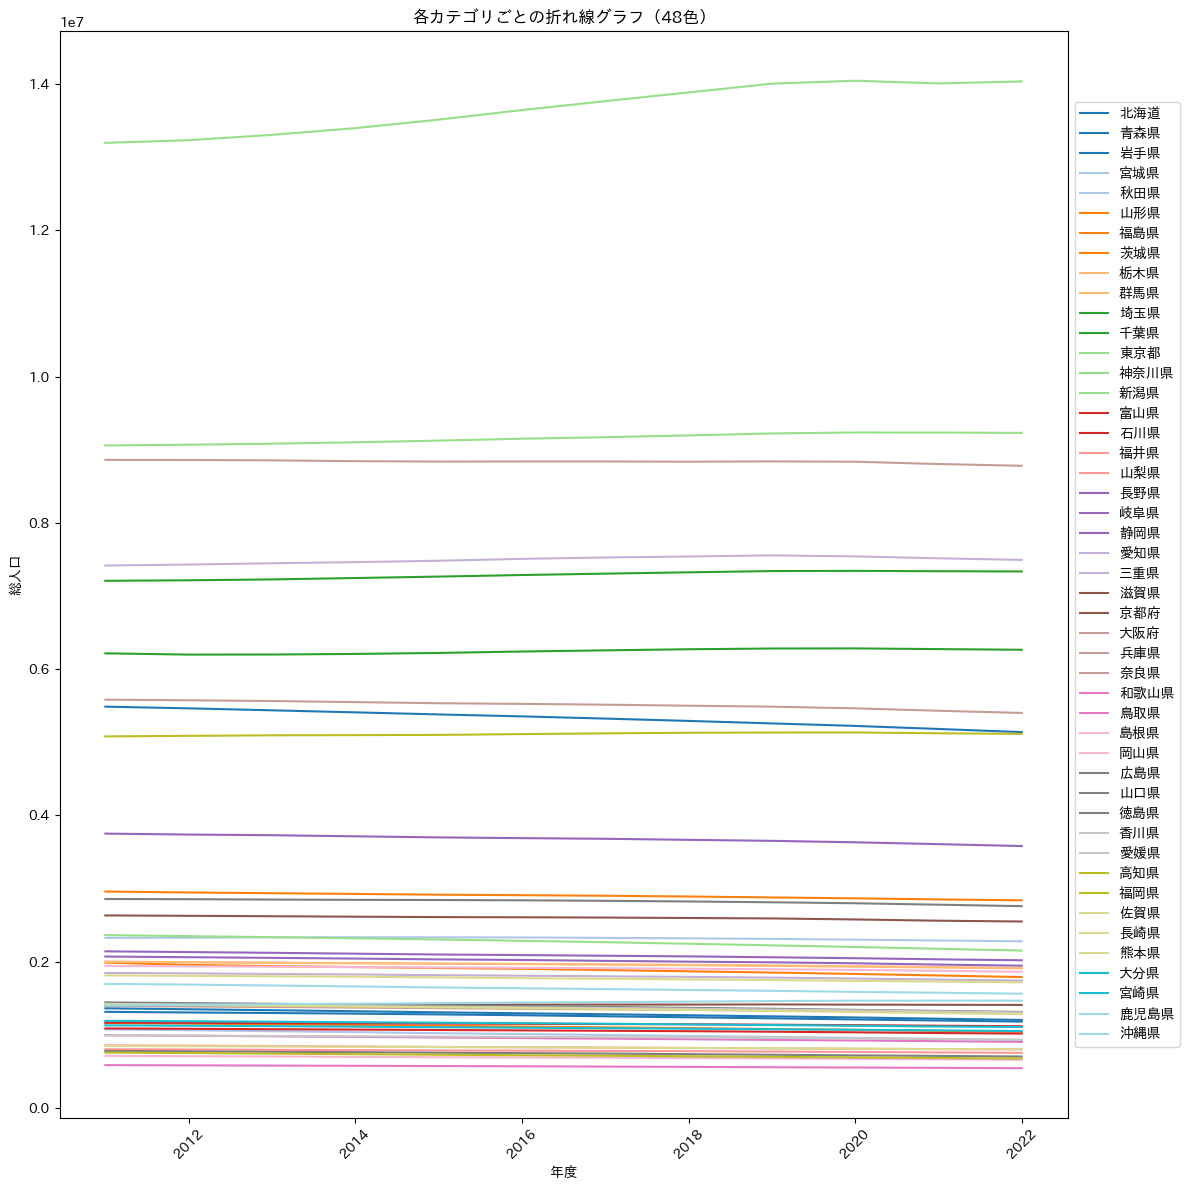

In [156]:
# カテゴリ一覧
#categories = df_B.iloc[:, 2].unique()
num_categories = len(categories)

# 48色を作成（Set3などのカラーマップで足りない場合はrainbow等で代用）
colors = cm.get_cmap('tab20', 48)(np.linspace(0, 1, 48))

# 描画設定
plt.figure(figsize=(12, 12))

# 各カテゴリごとに処理
for i, category in enumerate(categories):
    group = df_B[df_B.iloc[:, 2] == category]
    sorted_group = group.sort_values(by=df_B.columns[0], ascending=False)
    plt.plot(sorted_group.iloc[:, 0], sorted_group.iloc[:, 3],
             label=str(category), color=colors[i % 48])

# グラフ装飾
plt.xlabel(df_B.columns[0])
plt.ylabel(df_B.columns[3])
plt.title('各カテゴリごとの折れ線グラフ（48色）')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 右側に凡例を表示
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

In [141]:
#df_D_all = df_D[df_D.iloc[:, 0] == '0_総数'].head()

In [142]:
df_D_all_gametime = df_D_all["MD31"]

In [143]:
print("スマートフォン・家庭用ゲーム機などによるゲームによる時間",df_D_all_gametime )

スマートフォン・家庭用ゲーム機などによるゲームによる時間 1    42.9
2    44.2
3    34.4
4    36.9
5    42.5
Name: MD31, dtype: float64


In [144]:
df_D_all["MD31"].describe()

count     5.000000
mean     40.180000
std       4.275161
min      34.400000
25%      36.900000
50%      42.500000
75%      42.900000
max      44.200000
Name: MD31, dtype: float64

In [145]:
df_D.head()

,SSDSE-D-2023,2021年,Prefecture,MA00,MB00,MB01,MB011,MB012,MB02,MB021,...,MG20,MG51,MG52,MG53,MH01,MH02,MH03,MH04,MH51,MH52
0,男女の別,地域コード,都道府県,推定人口（10歳以上）,学習・自己啓発・訓練の総数,外国語,英語,英語以外の外国語,商業実務・ビジネス関係(総数),パソコンなどの情報処理,...,その他,通勤・通学,仕事,学業,起床,朝食開始,夕食開始,就寝,出勤,仕事からの帰宅時間
1,0_総数,R00000,全国,112462,39.6,14.1,12.8,4.2,20.1,16.5,...,16,79,340,393,6:38,7:11,18:58,23:04,8:20,18:34
2,0_総数,R01000,北海道,4614,35.0,11.1,9.9,3.3,17.0,14.1,...,15,64,343,391,6:33,7:13,18:36,22:50,8:19,18:07
3,0_総数,R02000,青森県,1090,25.4,7.4,6.6,2.0,12.7,10.3,...,12,61,370,423,6:17,6:59,18:31,22:29,8:09,18:01
4,0_総数,R03000,岩手県,1075,28.9,7.7,7.1,2.4,12.8,10.3,...,17,63,362,472,6:21,6:59,18:44,22:35,8:09,18:06


In [146]:
df_D_all_drop_zenkoku = df_D.drop(1, axis=0).reset_index(drop=True)
df_D_all_drop_zenkoku.head()

,SSDSE-D-2023,2021年,Prefecture,MA00,MB00,MB01,MB011,MB012,MB02,MB021,...,MG20,MG51,MG52,MG53,MH01,MH02,MH03,MH04,MH51,MH52
0,男女の別,地域コード,都道府県,推定人口（10歳以上）,学習・自己啓発・訓練の総数,外国語,英語,英語以外の外国語,商業実務・ビジネス関係(総数),パソコンなどの情報処理,...,その他,通勤・通学,仕事,学業,起床,朝食開始,夕食開始,就寝,出勤,仕事からの帰宅時間
1,0_総数,R01000,北海道,4614,35.0,11.1,9.9,3.3,17.0,14.1,...,15,64,343,391,6:33,7:13,18:36,22:50,8:19,18:07
2,0_総数,R02000,青森県,1090,25.4,7.4,6.6,2.0,12.7,10.3,...,12,61,370,423,6:17,6:59,18:31,22:29,8:09,18:01
3,0_総数,R03000,岩手県,1075,28.9,7.7,7.1,2.4,12.8,10.3,...,17,63,362,472,6:21,6:59,18:44,22:35,8:09,18:06
4,0_総数,R04000,宮城県,2065,37.5,12.4,10.9,4.0,18.9,16.0,...,16,73,352,395,6:31,7:12,18:49,22:49,8:08,18:26


In [147]:
print('都道府県別ゲーム時間', df_D_all_drop_zenkoku.groupby(df_D.iloc[:, 2])['MD31'].mean())

都道府県別ゲーム時間 Prefecture
三重県     43.933333
京都府     45.766667
佐賀県     35.100000
全国      44.300000
兵庫県     42.466667
北海道     34.566667
千葉県     48.366667
和歌山県    34.300000
埼玉県     43.666667
大分県     36.033333
大阪府     42.000000
奈良県     37.833333
宮城県     33.833333
宮崎県     35.366667
富山県     42.566667
山口県     37.366667
山形県     37.433333
山梨県     36.933333
岐阜県     42.800000
岡山県     41.166667
岩手県     42.600000
島根県     39.866667
広島県     37.733333
徳島県     39.666667
愛媛県     37.300000
愛知県     41.166667
新潟県     36.700000
東京都     47.933333
栃木県     40.166667
沖縄県     42.950000
滋賀県     43.266667
熊本県     36.166667
石川県     39.933333
神奈川県    38.333333
福井県     36.900000
福岡県     36.933333
福島県     41.233333
秋田県     35.833333
群馬県     44.000000
茨城県     40.500000
都道府県          NaN
長崎県     38.366667
長野県     41.900000
青森県     36.966667
静岡県     48.400000
香川県     39.533333
高知県     42.700000
鳥取県     35.733333
鹿児島県    36.533333
Name: MD31, dtype: float64


In [148]:
print('都道府県別ゲーム時間', df_D_all_drop_zenkoku.groupby(df_D.iloc[:, 2])['MD31'].mean().sort_values(ascending=False))

都道府県別ゲーム時間 Prefecture
静岡県     48.400000
千葉県     48.366667
東京都     47.933333
京都府     45.766667
全国      44.300000
群馬県     44.000000
三重県     43.933333
埼玉県     43.666667
滋賀県     43.266667
沖縄県     42.950000
岐阜県     42.800000
高知県     42.700000
岩手県     42.600000
富山県     42.566667
兵庫県     42.466667
大阪府     42.000000
長野県     41.900000
福島県     41.233333
岡山県     41.166667
愛知県     41.166667
茨城県     40.500000
栃木県     40.166667
石川県     39.933333
島根県     39.866667
徳島県     39.666667
香川県     39.533333
長崎県     38.366667
神奈川県    38.333333
奈良県     37.833333
広島県     37.733333
山形県     37.433333
山口県     37.366667
愛媛県     37.300000
青森県     36.966667
福岡県     36.933333
山梨県     36.933333
福井県     36.900000
新潟県     36.700000
鹿児島県    36.533333
熊本県     36.166667
大分県     36.033333
秋田県     35.833333
鳥取県     35.733333
宮崎県     35.366667
佐賀県     35.100000
北海道     34.566667
和歌山県    34.300000
宮城県     33.833333
都道府県          NaN
Name: MD31, dtype: float64


In [149]:
print('都道府県別睡眠時間', df_D_all_drop_zenkoku.groupby(df_D.iloc[:, 2])['MG01'].mean())

都道府県別睡眠時間 Prefecture
三重県     478.000000
京都府     471.333333
佐賀県     472.000000
全国      480.000000
兵庫県     473.333333
北海道     488.333333
千葉県     467.666667
和歌山県    480.000000
埼玉県     471.000000
大分県     479.333333
大阪府     470.333333
奈良県     475.666667
宮城県     486.000000
宮崎県     485.333333
富山県     479.000000
山口県     472.333333
山形県     479.333333
山梨県     476.333333
岐阜県     469.333333
岡山県     479.000000
岩手県     483.666667
島根県     470.666667
広島県     477.333333
徳島県     477.333333
愛媛県     484.666667
愛知県     477.000000
新潟県     475.333333
東京都     467.666667
栃木県     475.000000
沖縄県     473.500000
滋賀県     476.333333
熊本県     475.333333
石川県     481.333333
神奈川県    478.333333
福井県     479.333333
福岡県     478.333333
福島県     476.000000
秋田県     483.333333
群馬県     471.000000
茨城県     475.000000
都道府県           NaN
長崎県     476.333333
長野県     474.000000
青森県     480.000000
静岡県     473.000000
香川県     473.000000
高知県     476.000000
鳥取県     479.333333
鹿児島県    481.000000
Name: MG01, dtype: float64


In [150]:
print('都道府県別睡眠時間', df_D_all_drop_zenkoku.groupby(df_D.iloc[:, 2])['MG01'].mean().sort_values(ascending=False))

都道府県別睡眠時間 Prefecture
北海道     488.333333
宮城県     486.000000
宮崎県     485.333333
愛媛県     484.666667
岩手県     483.666667
秋田県     483.333333
石川県     481.333333
鹿児島県    481.000000
和歌山県    480.000000
青森県     480.000000
全国      480.000000
大分県     479.333333
鳥取県     479.333333
福井県     479.333333
山形県     479.333333
岡山県     479.000000
富山県     479.000000
福岡県     478.333333
神奈川県    478.333333
三重県     478.000000
広島県     477.333333
徳島県     477.333333
愛知県     477.000000
山梨県     476.333333
滋賀県     476.333333
長崎県     476.333333
福島県     476.000000
高知県     476.000000
奈良県     475.666667
熊本県     475.333333
新潟県     475.333333
茨城県     475.000000
栃木県     475.000000
長野県     474.000000
沖縄県     473.500000
兵庫県     473.333333
静岡県     473.000000
香川県     473.000000
山口県     472.333333
佐賀県     472.000000
京都府     471.333333
群馬県     471.000000
埼玉県     471.000000
島根県     470.666667
大阪府     470.333333
岐阜県     469.333333
東京都     467.666667
千葉県     467.666667
都道府県           NaN
Name: MG01, dtype: float64
